# Линейная регрессия

В этом домашнем задании мы работаем с набором данных об уровне счастья в странах за 2019 год. Он доступен в репозитории или можно скачать с Kaggle [соревнования](https://www.kaggle.com/unsdsn/world-happiness?select=2019.csv).

Все импорты помещаем сверху, под этой клеткой.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import sklearn.model_selection
from sklearn.preprocessing import MinMaxScaler
import sklearn.metrics 
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import fetch_california_housing
import  sklearn.metrics
from sklearn.model_selection import train_test_split

1.Считайте данные с помощью pandas в переменную `df`.

In [2]:
df = pd.read_csv('2019.csv')

2.Выведите диаграмму рассеяния признаков `Score` и `GDP per capita` используя метод `regplot()` из `seaborn`.

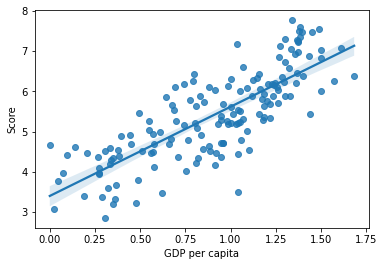

In [3]:
sns.regplot(data = df, x = 'GDP per capita', y = 'Score');

Мы будем моделировать эту зависимость. То есть независимой переменной является `GDP per capita`, зависимой `Score`. Судя по диаграмме рассеяния, зависимость между этими двумя переменными должна хорошо описываться линейной моделью.

## Решение задачи линейной регрессии методом градиентного спуска

Обозначения:
- `X` - матрица признаков
- `y` - целевая переменная
- `theta` - вектор параметров
- `alpha` - темп обучения (learning rate)

3.Реализуйте формулу предсказания линейной регрессии в методе `predict`. Метод возвращает предсказание. Напомню, что для каждого наблюдения из матрицы признаков предсказание находим с помощью следующей формулы:
$$x \in X, i \in [1,m], j : \\ \hat{y}_i = \theta_0 + \theta_1 x_1 + ... + \theta_n x_n = \theta^T x ,\\
\text{где m - количество наблюдений, } \\ 
\text{n - количество признаков, } \\
x_0 = 1 \ \text{для всех наблюдений}.
$$

Предсказания для всех наблюдений в матрице Х можем найти как матрица признаков умноженная на веса.

In [4]:
def predict(X, theta):
    prdiction = 0
    prdiction = np.dot(theta.T, X.T)
    return prdiction

4.Дополните вычисление значения функции затрат, формула которой приведена в слайдах лекции о линейной регрессии (подсказка - формула такая же, как если бы мы считали среднеквадратичную ошибку).   
Метод `cost()` принимает вектор параметров `theta`, матрицу наших признаков `X` и реальные значения  целевой переменной `y`.


In [5]:
def cost(theta, X, y):
    m = len(y)
    predictions = predict(X, theta)
    cost =  np.sum(np.subtract(np.dot(theta.T,X.T).T,y)**2)/(2*m) # ваш код тут
    return cost

5.Дополните методы `get_gradient()` и `gradient_descent()`, которые позволят реализовать  алгоритм градиетного спуска. 
- Метод `get_gradient()` возвращает 
    - вектор частных производных функции затрат по каждому из параметров линейной регрессии
    - среднеквадратичное отклонение прогноза от факта с параметрами на данном шаге (это дополнительная информация, её можно было бы вынести из метода get_gradient, но я вам предлагаю работать с такой реализацией).
- Метод `gradient_descent()` реализовует градиентый спуск в задаче линейной регрессии. В ходе градиентного спука мы обновляем параметры согласно формуле: 
$$
\text{для каждого} \ j \in [0, n]: \quad \theta_j := \theta_j - \alpha \frac{\partial}{\partial \theta_j}J(\theta), \\ 
\text{где n - количество признаков}
$$
    Метод градиентного спуска обновляет веса (модель обучается) пока они не перестанут меняться от итерации к итерации, то есть пока расстояние между векторами весов за последние две итерации не будет менее небольшой константы (обычно обозначается как $\epsilon$ (эпсилон), мы установим $\epsilon=10^{-6}$).

Заполните все места, где стоят троеточия. Используйте реализованные в предыдущих заданиях методы `cost()` и `predict()`.

In [6]:
def get_gradient(theta, X, y):
    y_estimate = predict(X, theta).T # ваш код тут
    error = y - y_estimate
    gradient = -(1.0/len(X)) * X.T.dot(error)
    mean_squared_error = cost(theta, X, y) #ваш код тут
    return gradient, mean_squared_error

In [7]:
def gradient_descent(X, y, theta, learning_rate, eps, max_iterations):
    cost_history = []
    theta_history = []
    iterations = 1
    while True:
        gradient, error = get_gradient(theta, X, y)
        cost_history.append(error)
        new_theta = theta - learning_rate * gradient
        theta_history.append(new_theta)
        # Условие остановки
        if np.sum(error) < eps:
            print( "Алгоритм сошёлся.")
            break
            
        # Второе условие остановки
        if iterations >= max_iterations:
            print("Достигнуто максимальное число итераций")
            break

        # Выводим информацию каждые 100 итераций
        #if iterations % 100 == 0:
             #print ("Итерация: %d - Ошибка на трейн данных: %.4f" %(iterations, error))

        iterations += 1
        theta = new_theta
    return theta, cost_history, theta_history, iterations


Подготовим данные.

In [8]:
X = df['GDP per capita'].values.reshape(-1,1)
y = df['Score'].values.reshape(-1,1)

6.Разделите `X` и `y` на `train` и `test` подвыборки в соотношении 80/20. Поскольку у нас мало данных, валидационную выборку выделять не будем. Запишите результаты в `X_train`, `y_train`, `X_test`, `y_test`.

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

7.Реализуйте масштабирование признаков с использованием `MinMaxScaler`. Помните о том, как мы применяем масштабирование признаков на `train` и `test` выборках.

In [10]:
scaler = MinMaxScaler()
scaler.fit(X_train)
scaler.transform(X_train)

array([[0.66508314],
       [0.16330166],
       [0.54691211],
       [0.15914489],
       [0.22862233],
       [0.402019  ],
       [0.58491686],
       [0.47505938],
       [0.48159145],
       [0.72505938],
       [0.20783848],
       [0.8087886 ],
       [0.85391924],
       [0.63539192],
       [0.19714964],
       [0.62470309],
       [0.61401425],
       [0.4608076 ],
       [0.70249406],
       [0.33372922],
       [0.83313539],
       [0.52612827],
       [0.22565321],
       [0.73515439],
       [0.82897862],
       [0.66745843],
       [0.32719715],
       [0.12114014],
       [0.72505938],
       [0.81532067],
       [0.3675772 ],
       [0.81472684],
       [0.2672209 ],
       [0.11342043],
       [0.79572447],
       [0.        ],
       [0.57007126],
       [0.41211401],
       [0.70130641],
       [1.        ],
       [0.44239905],
       [0.57007126],
       [0.68824228],
       [0.78622328],
       [0.39014252],
       [0.71615202],
       [0.41330166],
       [0.027

8.Добавьте колонку из единичек в массивы `X_train`, `X_test`.

In [11]:
X_train = np.hstack((np.ones_like(X_train),X_train))
X_test = np.hstack((np.ones_like(X_test),X_test))

9.Установите темп обучения равный 0.01, точность эпсилон равный $10^{-6}$, количество итераций равное 20000 и запустите градиентный спуск на тренировочных данных, передав все необходимые параметры.

In [12]:
learning_rate = 0.01
max_iterations = 20000
epsilon = 1E-6

theta = np.random.randn(2,1)

theta, cost_history, theta_history, iterations = gradient_descent(X_train, y_train, theta, learning_rate, epsilon, max_iterations)

Достигнуто максимальное число итераций


10.Отобразите на линейном графике значения переменной `cost_history`. Используйте любую библиотеку для визуализации на ваш выбор.

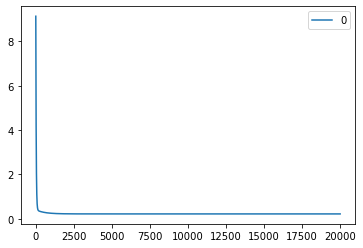

In [13]:
pd.DataFrame(cost_history).plot();

Отобразите только первые 500 итераций. Похоже, после них модель мало обучается. Мы могли бы применить технику ранней остановки в данном случае и остановиться на некотором небольшом количестве итераций. Обычно эта техника применяется, чтоб избежать переобучения. При этом теряется немного точности на тренировочном наборе данных.

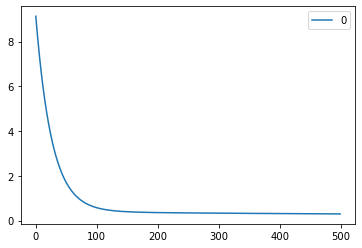

In [14]:
pd.DataFrame(cost_history[:500]).plot();

Выведем полученные параметры и последнее значение функции затрат.

In [15]:
print('Theta0:          {:0.3f},\nTheta1:          {:0.3f}'.format(theta[0][-1],theta[1][-1]))
print('Final cost/MSE:  {:0.3f}'.format(cost_history[-1]))
print('Number of iterateions: {:d}'.format(iterations))

Theta0:          3.421,
Theta1:          2.203
Final cost/MSE:  0.221
Number of iterateions: 20000


11.Реализуйте метод `mean_squared_error` согласно формуле в лекции. Его релализация похожа на метод `cost_function`, но другие входящие переменные.

In [16]:
def my_mean_squared_error(y_true, y_predicted):
    error =  ((y_true - y_predicted)**2).mean()
    return error

12.Найдите прогнозы на `X_train_df`, `X_test_df` и посчитайте ошибку прогнозов на обеих подвыборках.

In [17]:
learning_rate = 0.01
max_iterations = 20000
epsilon = 1E-6

theta = np.random.randn(2,1)

theta_train, cost_history, theta_history, iterations = gradient_descent(X_train, y_train, theta, learning_rate, epsilon, max_iterations)
y_grad_train = theta_train.T.dot(X_train.T)
mse_train = my_mean_squared_error(y_train, y_grad_train )

theta_test, cost_history, theta_history, iterations = gradient_descent(X_test, y_test, theta, learning_rate, epsilon, max_iterations)
y_grad_test = theta_test.T.dot(X_test.T)
mse_test = my_mean_squared_error(y_test, y_grad_test)

Достигнуто максимальное число итераций
Достигнуто максимальное число итераций


In [18]:
print('MSE Train', mse_train)
print('MSE Test ',mse_test)

MSE Train 2.1171995606070997
MSE Test  1.5768722664234351


13.Выведите диаграмму рассеяния признаков `Score` и `GDP per capita` и добавьте линию прогноза модели

In [19]:
data1 = pd.DataFrame(X_train[:,1], columns = ['GDP per capita'])
data1['Data'] = 'train'
data1['Score'] = y_train
data1['Pred'] = y_grad_train.reshape(-1,1)
data2 = pd.DataFrame(X_test[:,1], columns = ['GDP per capita'])
data2['Data'] = 'test'
data2['Score'] = y_test
data2['Pred'] = y_grad_test.reshape(-1,1)
data = pd.concat([data1, data2],ignore_index=True)

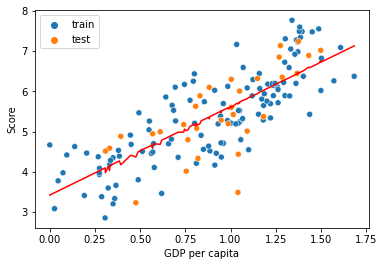

In [20]:
sns.scatterplot(data=data, x="GDP per capita", y="Score", hue = 'Data');
sns.lineplot(data=data, x="GDP per capita", y="Pred", color = 'red');

14.Обучите линейную регрессию на наборе данных состоящем только из признака `GDP per capita`, но теперь используя LinearRegression из sklearn.   
Подумайте, надо ли в sklearn модель подавать колонку из единичек, которую мы подавали в самописную модель.

In [21]:
lr = LinearRegression().fit(X_train,y_train)
y_lr_test = lr.predict(X_test)

Сравните ошибку на тестовой выборке линейной регрессии, написанной вами, и из sklearn. Есть ли разница в значениях?

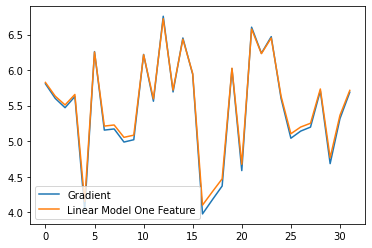

In [22]:
models_pred = pd.DataFrame(y_grad_test.reshape(-1,1), columns = ['Gradient'])
models_pred['Linear Model One Feature'] = y_lr_test
models_pred.plot();

15.Обучим линейную регрессию на большем количестве признаков и посмотрим, удастся ли улучшить модель.

15.1.Обучите линейную регрессию из sklearn используя в качестве набора признаков следующий: `GDP per capita`, `Social support`, `Healthy life expectancy`, `Freedom to make life choices`, `Generosity`, `Perceptions of corruption`

Не забудьте:  
1. Разделить на `train` и `test`.
2. Нормировать каждую колонку данных.  

In [23]:
X=df.iloc[:,3:]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

15.2.Выведите ошибку прогноза на `train` и `test` выборках. Сравните с результатом, полученным при обучении на одном признаке. Изменились ли метрики?

In [24]:
scaler = MinMaxScaler()
scaler.fit(X_train)
scaler.transform(X_train)
lr6 = LinearRegression().fit(X_train,y_train)
y_lr6_test = lr6.predict(X_test)
y_lr6_train = lr6.predict(X_train)

print(my_mean_squared_error(y_test, y_lr6_test))
print(my_mean_squared_error(y_train, y_lr6_train))

models_pred['Linear Model with 6 features'] = y_lr6_test
models_pred

0.4144641383528351
0.2364699215592196


,Gradient,Linear Model One Feature,Linear Model with 6 features
0,5.807393,5.826836,5.744205
1,5.601804,5.632972,5.565118
2,5.470974,5.509605,5.608903
3,5.627502,5.657205,5.908528
4,4.029511,4.150358,4.268558
5,6.260625,6.254216,6.262930
6,5.155581,5.212201,5.578697
7,5.171935,5.227622,5.154871
8,4.987371,5.053585,5.748658
9,5.020079,5.084427,4.758987


15.3.Выведите коэффициенты модели и определите, какие признаки имеют стоящие перед ними наибольшие коэффициенты по модулю (достаточно вывести названия признаков и коэффициенты в одном датафрейме).

In [25]:
coef = pd.DataFrame(X.columns,columns =['Features'])
coef['Coefficieint'] = lr6.coef_.reshape(-1,1)
coef.sort_values(by = 'Coefficieint', ascending = False)

,Features,Coefficieint
3,Freedom to make life choices,1.489813
1,Social support,1.232325
5,Perceptions of corruption,1.112431
2,Healthy life expectancy,0.930945
0,GDP per capita,0.750717
4,Generosity,0.270378


16.Обучите модель полиномиальной регрессии со степенью 2 на тех же данных, что и в предыдущем пункте. Используйте в процессе обучения `PolynomialFeatures`. Исследуйте метрики качества на трейн и тест датасетах. Есть ли переобучение (overfit)?

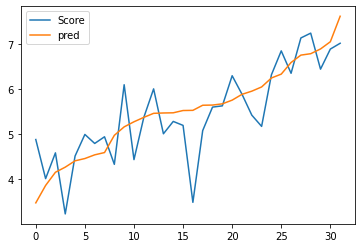

In [26]:
generator = PolynomialFeatures(degree=2)
pol_features = generator.fit_transform(X_train)
pol_regressor = LinearRegression()
pol_regressor.fit(pol_features, y_train)
pol_pred_train = pol_regressor.predict(pol_features)

pol = pd.DataFrame(y_test, columns = ['Score'])
pol_features = generator.fit_transform(X_test)

pol['pred'] = pol_regressor.predict(pol_features)

pol.sort_values(by='pred').reset_index(drop=True).plot();

In [27]:
def get_metrics(y_true,y_pred, n_digits=5):
    mse = sklearn.metrics.mean_squared_error (y_true=y_true, y_pred=y_pred)
    rmse = sklearn.metrics.mean_squared_error (y_true=y_true, y_pred=y_pred, squared = False)
    return dict(mse=round(mse, n_digits), rmse=round(rmse, n_digits))

In [28]:
print('Ploynomial Train', get_metrics(y_train,pol_pred_train))
print('Ploynomial Test', get_metrics(y_test,pol['pred']))

Ploynomial Train {'mse': 0.18085, 'rmse': 0.42526}
Ploynomial Test {'mse': 0.42222, 'rmse': 0.64979}


17.Сделайте пайплайн с шагами `MinMaxScaler`, `PolynomialFeatures` и `ElasticNet`. Проведите поиск оптимальных гиперпараметров на тренировочном наборе данных используя `GridSearchCV`, метрика качества.   
Какие риперпараметры искать выберите на своё усмотрение, к примеру, это могут быть параметры регуляризации `ElasticNet` или количество степеней в `PolynomialFeatures`.  
Выведите значения найденных оптимальных гиперпараметров.  
Лучшую модель из кросс валидации оцените на тестовом наборе данных.  


Какая модель в домашнем задании дала лучшие значения среднеквадратичной ошибки на тестовых данных, лин. регрессия написанная самостоятельно, лин. регрессия из sklearn, полиномиальная регрессия со степенями признаков 2, модель найденная в результате поиска гиперпараметров?  

In [29]:
pipeline = Pipeline([
    ('scaler', MinMaxScaler()),
    ('poly_features', PolynomialFeatures(degree=2)),
    ('model', ElasticNet())
])

In [30]:
search = GridSearchCV(
    pipeline,
    {'model__alpha':np.arange(0,10,0.1)},
    cv = 5, 
    scoring="neg_mean_squared_error",
    verbose=3
)
search

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('poly_features', PolynomialFeatures()),
                                       ('model', ElasticNet())]),
             param_grid={'model__alpha': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
       2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8,
       3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1,
       5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4,
       6.5, 6.6, 6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7,
       7.8, 7.9, 8. , 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9. ,
       9.1, 9.2, 9.3, 9.4, 9.5, 9.6, 9.7, 9.8, 9.9])},
             scoring='neg_mean_squared_error', verbose=3)

In [31]:
search.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV 1/5] END .................model__alpha=0.0;, score=-0.320 total time=   0.0s
[CV 2/5] END .................model__alpha=0.0;, score=-0.183 total time=   0.0s
[CV 3/5] END .................model__alpha=0.0;, score=-0.349 total time=   0.0s
[CV 4/5] END .................model__alpha=0.0;, score=-0.256 total time=   0.0s
[CV 5/5] END .................model__alpha=0.0;, score=-0.348 total time=   0.0s
[CV 1/5] END .................model__alpha=0.1;, score=-0.306 total time=   0.0s
[CV 2/5] END .................model__alpha=0.1;, score=-0.349 total time=   0.0s
[CV 3/5] END .................model__alpha=0.1;, score=-0.274 total time=   0.0s
[CV 4/5] END .................model__alpha=0.1;, score=-0.320 total time=   0.0s
[CV 5/5] END .................model__alpha=0.1;, score=-0.381 total time=   0.0s
[CV 1/5] END .................model__alpha=0.2;, score=-0.406 total time=   0.0s
[CV 2/5] END .................model__alpha=0.2

/Users/macbook/opt/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/macbook/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/Users/macbook/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.487978745262948, tolerance: 0.013437523262626264
  model = cd_fast.enet_coordinate_descent(
/Users/macbook/opt/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use

[CV 2/5] END .................model__alpha=0.4;, score=-1.278 total time=   0.0s
[CV 3/5] END .................model__alpha=0.4;, score=-0.827 total time=   0.0s
[CV 4/5] END .................model__alpha=0.4;, score=-1.402 total time=   0.0s
[CV 5/5] END .................model__alpha=0.4;, score=-1.162 total time=   0.0s
[CV 1/5] END .................model__alpha=0.5;, score=-0.954 total time=   0.0s
[CV 2/5] END .................model__alpha=0.5;, score=-1.492 total time=   0.0s
[CV 3/5] END .................model__alpha=0.5;, score=-1.012 total time=   0.0s
[CV 4/5] END .................model__alpha=0.5;, score=-1.562 total time=   0.0s
[CV 5/5] END .................model__alpha=0.5;, score=-1.345 total time=   0.0s
[CV 1/5] END ..model__alpha=0.6000000000000001;, score=-0.971 total time=   0.0s
[CV 2/5] END ..model__alpha=0.6000000000000001;, score=-1.492 total time=   0.0s
[CV 3/5] END ..model__alpha=0.6000000000000001;, score=-1.050 total time=   0.0s
[CV 4/5] END ..model__alpha=

/Users/macbook/opt/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:346: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/macbook/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/Users/macbook/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.351161928822847, tolerance: 0.015865308563709678
  model = cd_fast.enet_coordinate_descent(


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('poly_features', PolynomialFeatures()),
                                       ('model', ElasticNet())]),
             param_grid={'model__alpha': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
       2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8,
       3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1,
       5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4,
       6.5, 6.6, 6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7,
       7.8, 7.9, 8. , 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9. ,
       9.1, 9.2, 9.3, 9.4, 9.5, 9.6, 9.7, 9.8, 9.9])},
             scoring='neg_mean_squared_error', verbose=3)

In [32]:
search.best_params_

{'model__alpha': 0.0}

In [33]:
search.best_estimator_

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('poly_features', PolynomialFeatures()),
                ('model', ElasticNet(alpha=0.0))])

In [34]:
coefficients = search.best_estimator_.named_steps['model'].coef_

In [35]:
coefficients.round(2)

array([ 0.  ,  0.9 , -2.54, -0.83,  3.12, -0.58,  0.21, -0.93,  0.93,
       -1.55,  0.5 ,  2.24,  3.23, -4.1 , 11.42,  1.16,  6.65,  3.58,
       -1.36, -3.04, -3.62, -7.19, -0.54, -3.62,  0.74, -1.55,  1.07,
       -0.26])

In [36]:
feature_names = search.best_estimator_.named_steps['poly_features'].get_feature_names()
coef_df = pd.DataFrame(zip(feature_names, coefficients.round(3)), columns=['feature_name', 'coef'])

In [37]:
coef_df.sort_values('coef', ascending=False)[:10]

,feature_name,coef
14,x1 x2,11.418
16,x1 x4,6.646
17,x1 x5,3.579
12,x0 x5,3.233
4,x3,3.118
11,x0 x4,2.235
15,x1 x3,1.161
26,x4 x5,1.070
8,x0 x1,0.935
1,x0,0.904


In [38]:
X.columns.to_frame().reset_index(drop=True).to_dict()[0]

{0: 'GDP per capita',
 1: 'Social support',
 2: 'Healthy life expectancy',
 3: 'Freedom to make life choices',
 4: 'Generosity',
 5: 'Perceptions of corruption'}

In [39]:
search.best_score_

-0.2913222914546383

In [40]:
best_model = search.best_estimator_

y_grid_test = best_model.predict(X_test)

In [41]:
models_pred['Polynomial'] = pol['pred']
models_pred['Grid Search'] = y_grid_test

In [42]:
for col in models_pred.columns:
    print(col, get_metrics(y_test,models_pred[col]))

Gradient {'mse': 0.50461, 'rmse': 0.71036}
Linear Model One Feature {'mse': 0.50791, 'rmse': 0.71268}
Linear Model with 6 features {'mse': 0.41446, 'rmse': 0.64379}
Polynomial {'mse': 0.42222, 'rmse': 0.64979}
Grid Search {'mse': 0.3869, 'rmse': 0.62201}


In [43]:
df_models = pd.DataFrame(columns=['model','mse', 'rmse'])

for col in models_pred.columns:
    df_models = df_models.append({'model': col, 
                          'mse': get_metrics(y_test,models_pred[col])['mse'], 
                          'rmse': get_metrics(y_test,models_pred[col])['rmse']}, ignore_index=True)

df_models

,model,mse,rmse
0,Gradient,0.50461,0.71036
1,Linear Model One Feature,0.50791,0.71268
2,Linear Model with 6 features,0.41446,0.64379
3,Polynomial,0.42222,0.64979
4,Grid Search,0.38690,0.62201


Модель найденная в результате поиска гиперпараметров
дала лучшие значения среднеквадратичной ошибки на тестовых данных